In [9]:
import time
import matplotlib.pyplot as plt
import numpy as np


In [10]:
SUPERSCRIPT_MAP = {
    "0": "⁰", "1": "¹", "2": "²", "3": "³", "4": "⁴",
    "5": "⁵", "6": "⁶", "7": "⁷", "8": "⁸", "9": "⁹"
}
# Create a translation table
TRANS_TABLE = str.maketrans(SUPERSCRIPT_MAP)

def SUP(text):
    """Converts digits in a string to superscript."""
    return str(text).translate(TRANS_TABLE)

def func1(n):
    if (n==1):
        return 0
    else:
        return 1+func1(n//2)
    
def func2(n):
    count=0
    for i in range(n):
        count +=1
    return count

def func3(n):
    count=0
    for i in range(n):
        m = n
        while (m>1):
            count+=1
            m = m // 2
    return count

def eksperimen1(k):
    n = 2**k
    print("=" * 40)
    print(f"Eksperimen untuk n = 2{SUP(str(k))}")
    print("=" * 40)
    print(f"{'Run #':<8} {'Time (µs)':<12}")
    print("-" * 20)
    t_avg=0
    for i in range(5):
        start = time.perf_counter()
        result = func1(n)
        end = time.perf_counter()
        t = (end - start) * 1_000_000
        t_avg = t_avg + t/5
        print(f"{i+1:<8} {t:<12.2f}")
    print("-" * 20)
    print(f"{'Rata-rata':<8} {t_avg:<12.2f}")
    print("=" * 40)
    print()
    return k, n, t_avg

def tabel_eksperimen1(data):
    print("\n" + "=" * 60)
    print("HASIL EKSPERIMEN WAKTU EKSEKUSI FUNGSI REKURSIF")
    print("=" * 60)
    print(f"{'Eksponen (k)':<15} {'n = 2^k':<20} {'Waktu Rata-rata (µs)':<20}")
    print("-" * 60)
    
    for k, n, waktu in data:
        n_value = n
        # Format n dalam notasi ilmiah untuk nilai besar
        if k > 50:
            n_str = f"2{SUP(str(k))} ≈ {n_value:.2e}"
        else:
            n_str = f"2{SUP(str(k))} = {n_value}"
            
        print(f"{k:<15} {n_str:<20} {waktu:<20.2f}")
    
    print("=" * 60)

def plot_hasil_eksperimen1(data):
    # Ekstrak data
    k_values = [item[0] for item in data]
    n_values = [item[1] for item in data]
    waktu_values = [item[2] for item in data]
    
    # Buat figure dengan 2 subplot
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    # Plot 1: n vs waktu (skala linear)
    ax1.plot(n_values, waktu_values, 'bo-', linewidth=2, markersize=8, label='Waktu Eksekusi')
    ax1.set_xlabel('Nilai n', fontsize=12)
    ax1.set_ylabel('Waktu Eksekusi (µs)', fontsize=12)
    ax1.set_title('Hubungan n vs Waktu Eksekusi (Skala Linear)', fontsize=14)
    ax1.grid(True, alpha=0.3)
    ax1.legend()
    
    # Tambahkan anotasi untuk titik-titik data
    for i, (n, waktu) in enumerate(zip(n_values, waktu_values)):
        ax1.annotate(f'2^{k_values[i]}', (n, waktu), 
                    textcoords="offset points", xytext=(0,10), ha='center', fontsize=9)
    
    # Plot 2: n vs waktu (skala logaritmik)
    ax2.plot(n_values, waktu_values, 'ro-', linewidth=2, markersize=8, label='Waktu Eksekusi')
    ax2.set_xscale('log', base=2)
    ax2.set_xlabel('Nilai n (skala log basis 2)', fontsize=12)
    ax2.set_ylabel('Waktu Eksekusi (µs)', fontsize=12)
    ax2.set_title('Hubungan n vs Waktu Eksekusi (Skala Logaritmik)', fontsize=14)
    ax2.grid(True, alpha=0.3)
    ax2.legend()
    
    # Tambahkan anotasi untuk titik-titik data
    for i, (n, waktu) in enumerate(zip(n_values, waktu_values)):
        ax2.annotate(f'2^{k_values[i]}', (n, waktu), 
                    textcoords="offset points", xytext=(0,10), ha='center', fontsize=9)
    
    plt.tight_layout()
    plt.show()
    
    # Plot 3: k vs waktu (karena n = 2^k)
    plt.figure(figsize=(10, 6))
    plt.plot(k_values, waktu_values, 'go-', linewidth=2, markersize=8)
    plt.xlabel('Eksponen k (dimana n = 2^k)', fontsize=12)
    plt.ylabel('Waktu Eksekusi (µs)', fontsize=12)
    plt.title('Hubungan k vs Waktu Eksekusi', fontsize=14)
    plt.grid(True, alpha=0.3)
    
    # Tambahkan anotasi
    for i, (k, waktu) in enumerate(zip(k_values, waktu_values)):
        plt.annotate(f'n=2^{k}', (k, waktu), 
                    textcoords="offset points", xytext=(0,10), ha='center', fontsize=9)
    
    plt.tight_layout()
    plt.show()
    
    
def eksperimen2(k):
    n = 10**k
    print("=" * 40)
    print(f"Eksperimen untuk n = 10{SUP(str(k))}")
    print("=" * 40)
    print(f"{'Run #':<8} {'O(n) Time (µs)':<15} {'O(nlog(n)) Time (µs)':<20}")
    print("-" * 50)
    t2_avg=0
    t3_avg=0
    for i in range(5):
        start2 = time.perf_counter()
        result = func2(n)
        end2 = time.perf_counter()
        
        start3 = time.perf_counter()
        result = func3(n)
        end3 = time.perf_counter()
        
        t2 = (end2 - start2) * 1_000_000
        t2_avg = t2_avg + t2/5
        
        t3 = (end3 - start3) * 1_000_000
        t3_avg = t3_avg + t3/5
        
        print(f"{i+1:<8} {t2:<15.2f} {t3:<20.2f}")
    print("-" * 50)
    print(f"{'Rata-rata':<8} {t2_avg:<15.2f} {t3_avg:<20.2f}")
    print("=" * 40)
    print()
    return k, n, t2_avg, t3_avg

def buat_tabel_eksperimen2(data):
    print("\n" + "=" * 80)
    print("HASIL EKSPERIMEN PERBANDINGAN KOMPLEKSITAS O(n) vs O(n log n)")
    print("=" * 80)
    print(f"{'Eksponen (k)':<12} {'n = 10^k':<15} {'O(n) Time (µs)':<18} {'O(n log n) Time (µs)':<20} {'Rasio O(n log n)/O(n)':<20}")
    print("-" * 80)
    
    for k, n, t2, t3 in data:
        rasio = t3 / t2 if t2 > 0 else 0
        print(f"{k:<12} {f'10{SUP(str(k))}':<15} {t2:<18.2f} {t3:<20.2f} {rasio:<20.2f}")
    
    print("=" * 80)

def buat_grafik_eksperimen2(data):
    # Ekstrak data
    k_values = [item[0] for item in data]
    n_values = [item[1] for item in data]
    t2_values = [item[2] for item in data]  # O(n) times
    t3_values = [item[3] for item in data]  # O(n log n) times
    
    # Buat figure dengan multiple subplots
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))
    
    # Plot 1: Perbandingan langsung O(n) vs O(n log n) - skala linear
    ax1.plot(n_values, t2_values, 'bo-', linewidth=2, markersize=8, label='O(n)')
    ax1.plot(n_values, t3_values, 'ro-', linewidth=2, markersize=8, label='O(n log n)')
    ax1.set_xlabel('Nilai n', fontsize=12)
    ax1.set_ylabel('Waktu Eksekusi (µs)', fontsize=12)
    ax1.set_title('Perbandingan Waktu: O(n) vs O(n log n)\n(Skala Linear)', fontsize=14)
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    
    # Anotasi titik data
    for i, (n, t2, t3) in enumerate(zip(n_values, t2_values, t3_values)):
        ax1.annotate(f'10^{k_values[i]}', (n, t2), textcoords="offset points", 
                    xytext=(0,10), ha='center', fontsize=9, color='blue')
        ax1.annotate(f'10^{k_values[i]}', (n, t3), textcoords="offset points", 
                    xytext=(0,10), ha='center', fontsize=9, color='red')
    
    # Plot 2: Perbandingan dengan skala log-log
    ax2.loglog(n_values, t2_values, 'bo-', linewidth=2, markersize=8, label='O(n)')
    ax2.loglog(n_values, t3_values, 'ro-', linewidth=2, markersize=8, label='O(n log n)')
    ax2.set_xlabel('Nilai n (log scale)', fontsize=12)
    ax2.set_ylabel('Waktu Eksekusi (µs) (log scale)', fontsize=12)
    ax2.set_title('Perbandingan Waktu: O(n) vs O(n log n)\n(Skala Log-Log)', fontsize=14)
    ax2.legend()
    ax2.grid(True, alpha=0.3)
    
    # Plot 3: Rasio O(n log n) / O(n)
    rasio_values = [t3 / t2 for t2, t3 in zip(t2_values, t3_values)]
    ax3.plot(k_values, rasio_values, 'go-', linewidth=2, markersize=8)
    ax3.set_xlabel('Eksponen k (n = 10^k)', fontsize=12)
    ax3.set_ylabel('Rasio O(n log n) / O(n)', fontsize=12)
    ax3.set_title('Rasio Waktu Eksekusi\nO(n log n) / O(n)', fontsize=14)
    ax3.grid(True, alpha=0.3)
    
    # Anotasi rasio
    for i, (k, rasio) in enumerate(zip(k_values, rasio_values)):
        ax3.annotate(f'{rasio:.2f}', (k, rasio), textcoords="offset points", 
                    xytext=(0,10), ha='center', fontsize=9)
    
    # Plot 4: Pertumbuhan relatif terhadap teori
    # Teori: O(n) seharusnya linear, O(n log n) seharusnya n log n
    # Normalisasi dengan nilai pertama
    t2_normalized = [t / t2_values[0] for t in t2_values]
    t3_normalized = [t / t3_values[0] for t in t3_values]
    
    # Teori: untuk O(n), pertumbuhan seharusnya n/n0
    teori_t2 = [n / n_values[0] for n in n_values]
    # Untuk O(n log n), pertumbuhan seharusnya (n log n)/(n0 log n0)
    teori_t3 = [(n * np.log(n)) / (n_values[0] * np.log(n_values[0])) for n in n_values]
    
    ax4.plot(k_values, t2_normalized, 'bo-', linewidth=2, markersize=8, label='O(n) Eksperimen')
    ax4.plot(k_values, teori_t2, 'b--', linewidth=1, label='O(n) Teori')
    ax4.plot(k_values, t3_normalized, 'ro-', linewidth=2, markersize=8, label='O(n log n) Eksperimen')
    ax4.plot(k_values, teori_t3, 'r--', linewidth=1, label='O(n log n) Teori')
    ax4.set_xlabel('Eksponen k (n = 10^k)', fontsize=12)
    ax4.set_ylabel('Waktu Normalisasi', fontsize=12)
    ax4.set_title('Perbandingan Eksperimen vs Teori\n(Waktu Dinormalisasi)', fontsize=14)
    ax4.legend()
    ax4.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    return rasio_values

# Eksperimen 1
Analisis running time untuk fungsi dengan kompleksitas log(n)

Eksperimen untuk n = 2¹⁰⁰
Run #    Time (µs)   
--------------------
1        35.60       
2        15.60       
3        16.10       
4        16.20       
5        16.30       
--------------------
Rata-rata 19.96       

Eksperimen untuk n = 2¹³⁰
Run #    Time (µs)   
--------------------
1        27.50       
2        22.20       
3        24.10       
4        24.30       
5        22.90       
--------------------
Rata-rata 24.20       

Eksperimen untuk n = 2¹⁶⁰
Run #    Time (µs)   
--------------------
1        33.30       
2        27.60       
3        27.80       
4        27.30       
5        24.70       
--------------------
Rata-rata 28.14       

Eksperimen untuk n = 2¹⁸⁰
Run #    Time (µs)   
--------------------
1        34.30       
2        28.70       
3        31.50       
4        30.00       
5        29.40       
--------------------
Rata-rata 30.78       

Eksperimen untuk n = 2²¹⁰
Run #    Time (µs)   
--------------------
1        47.30       
2        32.8

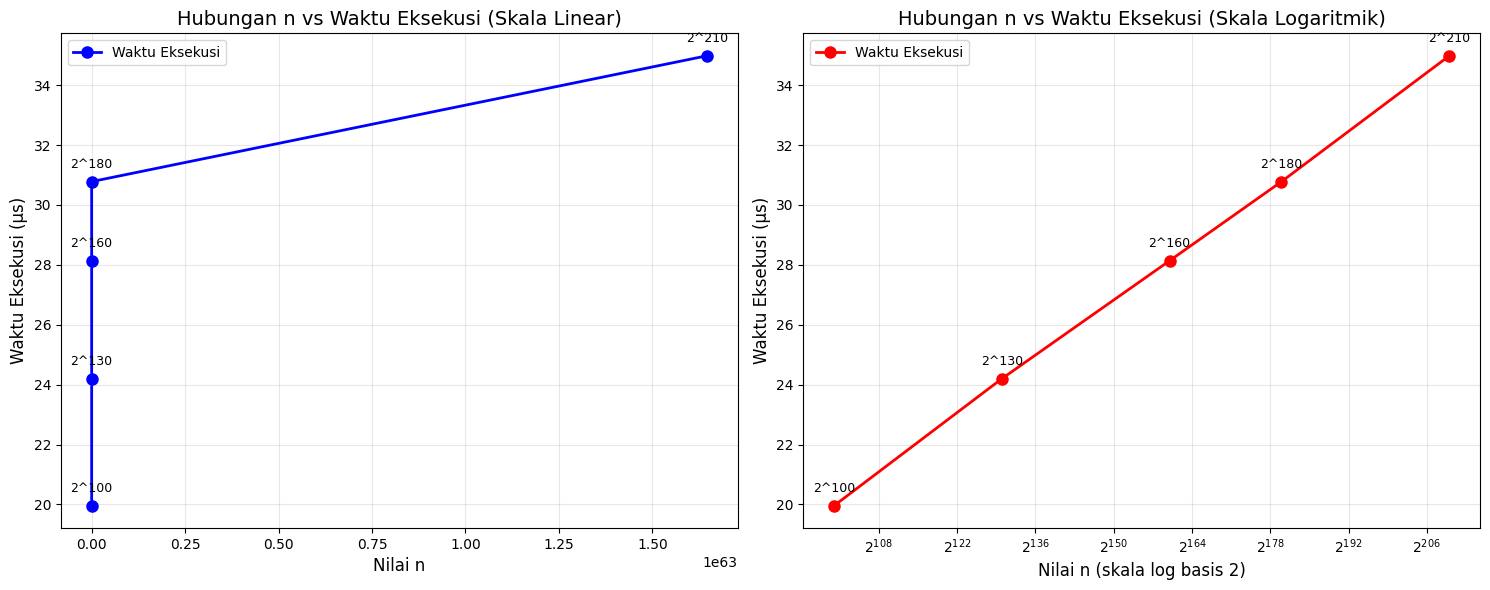

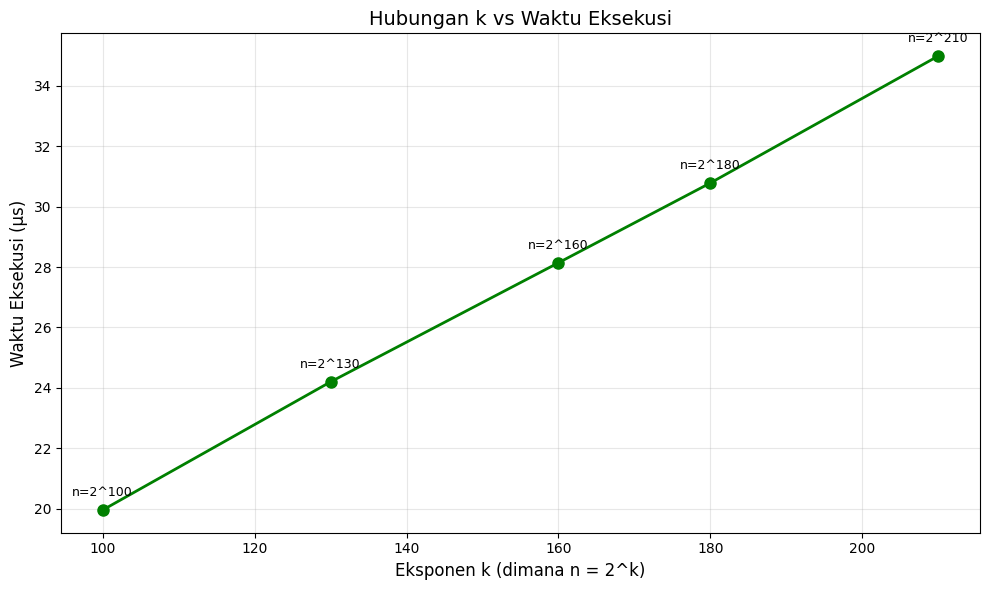

In [11]:
k = [100,130,160,180,210]
data=[]
for n in k:
    data.append(eksperimen1(n))
    
tabel_eksperimen1(data)
plot_hasil_eksperimen1(data)

# Eksperimen 2
Analisis running time untuk fungsi dengan kompleksitas n dan n log(n)

Eksperimen untuk n = 10³
Run #    O(n) Time (µs)  O(nlog(n)) Time (µs)
--------------------------------------------------
1        35.60           650.60              
2        45.00           724.00              
3        42.50           713.10              
4        55.20           718.50              
5        42.60           652.30              
--------------------------------------------------
Rata-rata 44.18           691.70              

Eksperimen untuk n = 10⁴
Run #    O(n) Time (µs)  O(nlog(n)) Time (µs)
--------------------------------------------------
1        425.30          9508.20             
2        408.50          9743.00             
3        562.20          8830.60             
4        306.60          11719.60            
5        376.30          8825.60             
--------------------------------------------------
Rata-rata 415.78          9725.40             

Eksperimen untuk n = 10⁵
Run #    O(n) Time (µs)  O(nlog(n)) Time (µs)
---------------------------

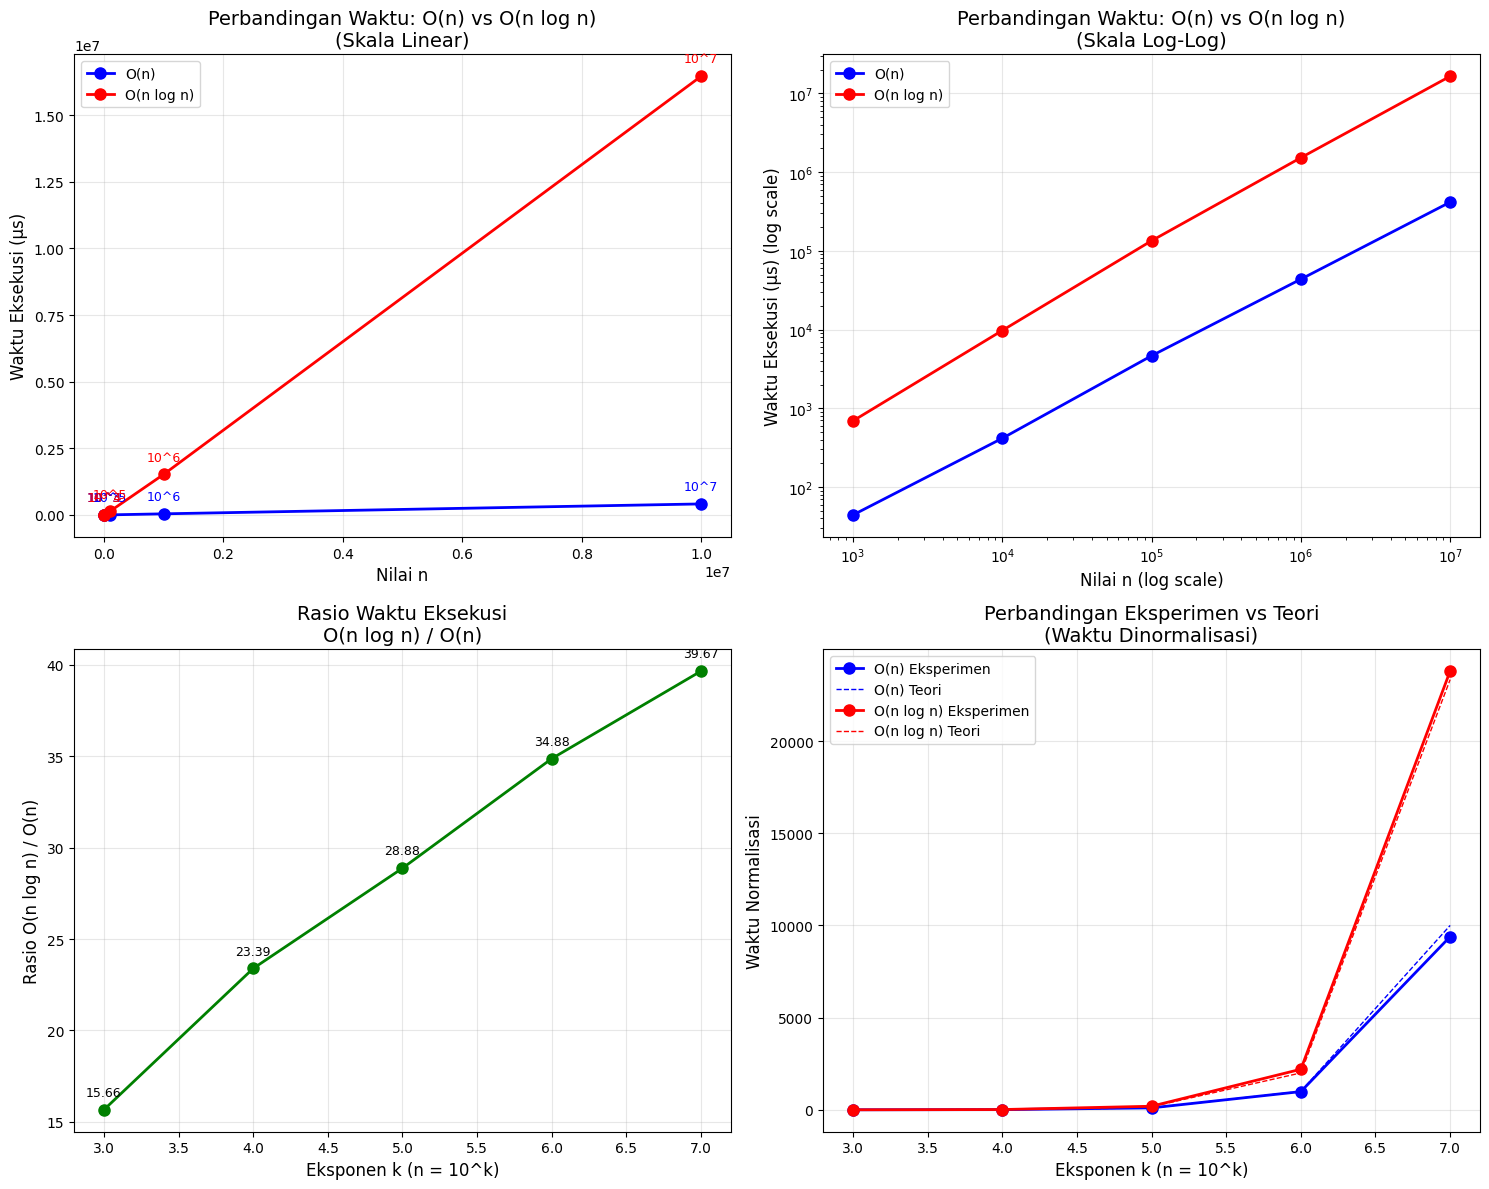

[15.656406018076787,
 23.39073584841447,
 28.87884620738167,
 34.876307557617025,
 39.66641865028937]

In [12]:
data = []
eks = [3,4,5,6,7]
for k in eks:
  data.append(eksperimen2(k))  

buat_tabel_eksperimen2(data)
buat_grafik_eksperimen2(data)